In [67]:
import numpy as np
import matplotlib.pyplot as plt

Starting with some synthetic data to perform the logistic regression,

In [68]:
# First the random seed to make results replaceable. 

np.random.seed(12)

# The number of data points that we are working with. 

num_samples = 100

# Starting with the labels. 

y = np.append(np.zeros(num_samples//2),np.ones(num_samples//2))

# The rough centers of the data, one could use a vector in place of a single value

center_of_type_0 = -1

center_of_type_1 = 1

level_of_noise = 0.8

#first the data that will be labeled with 0 

x_1 = (np.random.randn(num_samples//2)*level_of_noise + center_of_type_0)

#then the data that will be labeled with 1 

x_2 = (np.random.randn(num_samples//2)*level_of_noise + center_of_type_1)


x = np.append(x_1,x_2)



Visualizing the data

<function matplotlib.pyplot.show(close=None, block=None)>

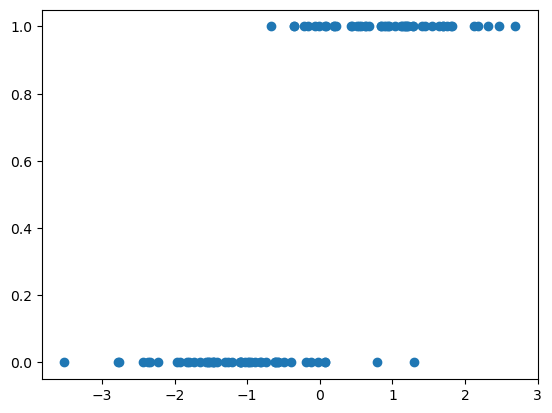

In [69]:
plt.scatter(x,y)
plt.show

Defining the sigmoid function that would make the predictions.

In [70]:
def sigmoid(X, weights, centerpoint):
    z = np.dot(X,weights)
    return 1/(1+np.exp(-(z-centerpoint)))

The loss function is defined in terms of the deviation between the actual labels and the predicted labels. 

In [71]:
def loss(y_hat,y):
    return (-y * np.log(y_hat) - (1-y) * np.log(1-y_hat)).mean()
    

The derivative function of the loss function to find the gradient vector with respect to the weights.

In [72]:
def gradient_vector(X, Y_hat , Y):
    return np.dot(X.T , (Y_hat - Y)/y.shape[0])

Lastly a function for updating the weights of the sigmoid function

In [73]:
def update_weights(weights, lr, gradient):
    return weights - lr * gradient

In [74]:
def update_centerpoint(centerpoint, lr, gradient):
    return centerpoint - lr * gradient

Making an estimation of the starting point for the sigmoid function.

In [75]:
def estimated_weights(X):
    return x.mean()

In [76]:
def runtheregression(X,Y,lr,epochs):
# Starting guess for the weights
    centerpoint = 0
    estimates = estimated_weights(X)
    weights = estimates
    losses = []
    for i in range(epochs):
# The forward pass 
        y_hat = sigmoid(X,weights,centerpoint)
# Loss calculation and display 
        if i % 10 == 0:
            loss_1 = loss(y_hat,Y)
            losses.append(loss_1)
# Optimizer 
        gradient = gradient_vector(X,y_hat, Y)
# Updating
        weights = update_weights(weights, lr , gradient)
    return weights, losses

<function matplotlib.pyplot.show(close=None, block=None)>

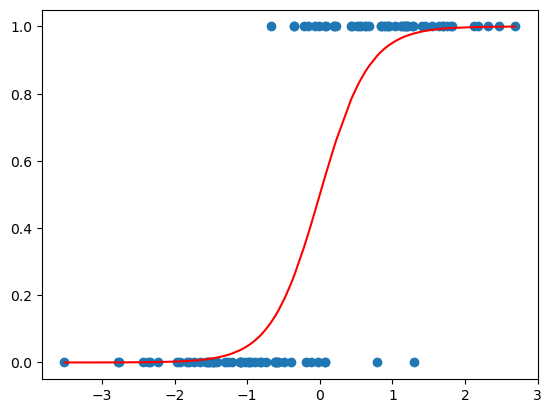

In [77]:
results = runtheregression(x,y,0.1,10000)
final_weights = results[0]
final_losses = results[1]

plt.scatter(x,y)
plt.plot(np.sort(x), sigmoid(np.sort(x),final_weights,0), '-r')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

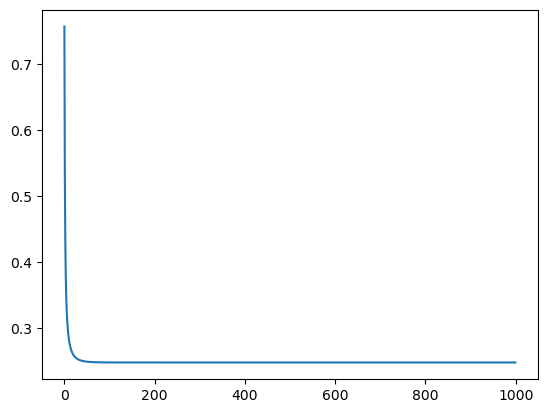

In [78]:
plt.plot(final_losses)
plt.show